In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
from scipy import signal
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [46]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [51]:
def stoch(data,EMA_fast=[],EMA_slow=[]):
    for ft in EMA_fast:
        for st in EMA_slow:
            data["slowk_"+str(ft)+"_"+str(st)],data["slowd_"+str(ft)+"_"+str(st)]= ta.STOCH(data.high,
                                                                                            data.low,
                                                                                            data.close,
                                                                                           fastk_period=ft,
                                                                                           slowk_period=st,
                                                                                           slowk_matype=0,
                                                                                           slowd_period=3,
                                                                                           slowd_matype=0)
            # signal turning point
            data=turning_point(data,coluna=["slowk_"+str(ft)+"_"+str(st)])
            #
            data["fastk_"+str(ft)+"_"+str(st)],data["fastd_"+str(ft)+"_"+str(st)]= ta.STOCHF(data.high,
                                                                                            data.low,
                                                                                            data.close,
                                                                                            fastk_period=ft,
                                                                                            fastd_period=3,
                                                                                            fastd_matype=0)
            # signal fastk
            data["fastk_"+str(ft)+"_"+str(st)+"_"+"s"]=0
            data.loc[(data["fastk_"+str(ft)+"_"+str(st)] > 50),"fastk_"+str(ft)+"_"+str(st)+"_"+"s"]=1
            data.loc[(data["fastk_"+str(ft)+"_"+str(st)] <= 50),"fastk_"+str(ft)+"_"+str(st)+"_"+"s"]=-1
    return data

In [48]:
def turning_point(data,coluna=[],ordem=3):
    for coluna in coluna:
        data[coluna+'_min'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.less_equal, order=ordem)[0]][coluna]
        data[coluna+'_max'] = data.iloc[argrelextrema(data[coluna].values, 
                                                  np.greater_equal, order=ordem)[0]][coluna]
        data[coluna+'_min'].fillna(0,inplace=True)
        data[coluna+'_max'].fillna(0,inplace=True)
        data["tp_"+coluna]=0
        data.loc[data[coluna+'_min']>0,"tp_"+coluna]=1
        data.loc[data[coluna+'_max']>0,"tp_"+coluna]=-1
        data[[coluna+'_min',coluna+'_max']]=np.nan
        data.drop([coluna+'_min',coluna+'_max'],axis=1,inplace=True)
    return data

In [60]:
# Candlestick graph
def candle_graph_stoch(data,nome_coluna_datas="datetime",n=200,fast="fastk_14_26",slow="slowk_14_26"):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(7,8)) 
    ax1 = plt.subplot2grid((7,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((7,1), (3, 0),rowspan=2)
    ax3 = plt.subplot2grid((7,1), (5, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    ax2.plot(ohlc[nome_coluna_datas], ohlc[fast], color = "r", lw=1,label=fast)
    ax3.plot(ohlc[nome_coluna_datas], ohlc[slow], color = "b", lw=1,label=slow)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    import matplotlib.ticker as ticker
    ax3.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax2.legend(loc=1,fontsize=8)
    ax3.legend(loc=1,fontsize=8)
    return plt.show()

## Exemplo:

In [52]:
df=stoch(data,EMA_fast=[7,14,21],EMA_slow=[26,35,50])
df.tail(4)

/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in less_equal
  results &= comparator(main, minus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:73: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, plus)
/Users/igoracmorais/anaconda3/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:74: RuntimeWarning: invalid value encountered in greater_equal
  results &= comparator(main, minus)


,open,high,low,close,volume,slowk_7_26,slowd_7_26,tp_slowk_7_26,fastk_7_26,fastd_7_26,...,tp_slowk_21_35,fastk_21_35,fastd_21_35,fastk_21_35_s,slowk_21_50,slowd_21_50,tp_slowk_21_50,fastk_21_50,fastd_21_50,fastk_21_50_s
datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-20,6469.28,6645.20,6395.45,6490.56,1.271858e+08,42.561732,44.319865,0,24.825768,25.877663,...,0,29.976103,29.251029,-1,42.522852,43.744144,0,29.976103,29.251029,-1
2018-10-21,6490.60,6557.39,6474.47,6509.87,1.052839e+08,41.914622,42.852434,0,26.776155,24.910842,...,0,31.792865,29.914321,-1,41.258075,42.508939,0,31.792865,29.914321,-1
2018-10-22,6509.87,6531.23,6460.38,6483.23,2.027669e+08,41.946609,42.140988,0,26.643599,26.081841,...,0,29.286467,30.351811,-1,39.955187,41.245371,0,29.286467,30.351811,-1
2018-10-23,6484.32,6490.71,6450.55,6450.55,1.040892e+08,40.087313,41.316182,1,22.062062,25.160605,...,-1,26.211802,29.097045,-1,38.632628,39.948630,1,26.211802,29.097045,-1


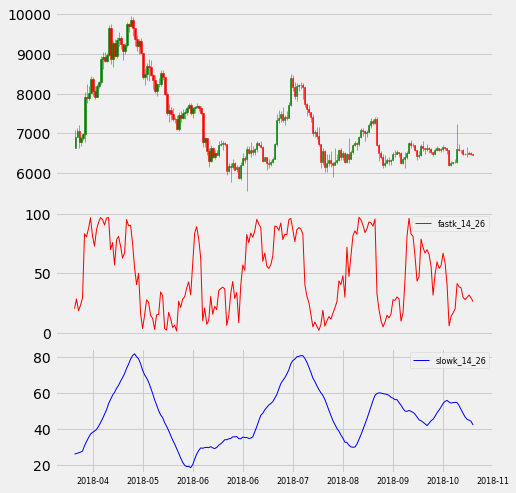

In [61]:
candle_graph_stoch(df)